In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMRegressor
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
class CFG:
    img_dim1 = 20
    img_dim2 = 10
random.seed(7)

#setting the metrics:

In [2]:

train = pd.read_csv("/Users/ahmed/Downloads/computerscience/AI-Compeitions/Rohlik Orders Forecasting Challenge/Data/train.csv")
test = pd.read_csv("/Users/ahmed/Downloads/computerscience/AI-Compeitions/Rohlik Orders Forecasting Challenge/Data/test.csv")
test_id = test['id']
for df in (train,test):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index(df['date'],inplace=True)

train.head()

,warehouse,date,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
date,,,,,,,,,,,,,,,,,,
2020-12-05,Prague_1,2020-12-05,6895.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
2020-12-06,Prague_1,2020-12-06,6584.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1688.0,32507.0,Prague_1_2020-12-06
2020-12-07,Prague_1,2020-12-07,7030.0,NaN,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1696.0,32552.0,Prague_1_2020-12-07
2020-12-08,Prague_1,2020-12-08,6550.0,NaN,0,0,0,0,0,0,0,0.0,0,0.8,0.0,1681.0,32423.0,Prague_1_2020-12-08
2020-12-09,Prague_1,2020-12-09,6910.0,NaN,0,0,0,0,0,0,0,0.0,0,0.5,0.0,1704.0,32410.0,Prague_1_2020-12-09


In [3]:
def encode(train:pd.DataFrame,test: pd.DataFrame,features: list[str]) -> tuple[pd.DataFrame]:
    traindata = train.copy()
    testdata = test.copy()
    traintest = pd.concat([traindata,testdata])
    le = LabelEncoder()
    for feat in features:
        le.fit(traintest[feat])
        traindata[feat] = le.transform(traindata[feat])
        testdata[feat] = le.transform(testdata[feat])
        
    return traindata, testdata

In [4]:
train, test = encode(train=train,test=test,features=['warehouse'])


In [5]:
def prepare_date(train: pd.DataFrame,test: pd.DataFrame,date) -> tuple[pd.DataFrame]:
    traindata = train.copy()
    testdata = test.copy()
    for df in (traindata,testdata): 
        df[date] = pd.to_datetime(df[date])
        df['day'] = df[date].dt.day
        df['month'] = df[date].dt.month
        df['year'] = df[date].dt.year
        df.set_index(date, inplace=True)
        df.sort_index()
        
    return traindata, testdata        

In [6]:
train,test = prepare_date(train,test,'date')

In [50]:
def lag(forecasting_window: int, n_lags,feats,data)-> pd.DataFrame:
    data_frame = data.copy()
    for i in range(n_lags):
        for feature in feats:
            data_frame[feature+"_lag" +str(i+forecasting_window)] = data_frame[feature].shift(i + forecasting_window)
            
    return data_frame

In [51]:
def feature_engineering(data: pd.DataFrame, feats: list[str]) -> pd.DataFrame:
    data_frame = data.copy()
    data_frame.sort_index(inplace=True)
    test_set = data_frame[data_frame['train'] == 0]
    data_frame = lag(len(data), 10,feats,data_frame)
    return data_frame

In [56]:
frames = []

In [61]:
def get_feats_to_eng() -> list[str]:
    return ['warehouse', 'orders', 'holiday_name', 'holiday', 'shutdown',
       'mini_shutdown', 'shops_closed', 'winter_school_holidays',
       'school_holidays', 'blackout', 'mov_change', 'frankfurt_shutdown',
       'precipitation', 'snow', 'user_activity_1', 'user_activity_2']

In [62]:
for _ , data in cv.split(df.drop(columns=['orders']), df['orders'], groups=df['warehouse']):
    data = df.iloc[data]
    data = feature_engineering(data,get_feats_to_eng)
    frames.append(data)

KeyError: "['orders'] not found in axis"

# Feature Engineering - Time Series

# Encoding

In [53]:
y = train['orders']
features = test.columns.tolist()
train = train.reindex(columns=features)
train['orders'] = y
test = test.reindex(columns=features)
cat_feats = train.select_dtypes(include='object')
cat_feats

encoder = LabelEncoder()
cat_feats = train.select_dtypes(include='object')
for df in(train,test):
    for col in df.columns:
        if col in cat_feats:
            df[col] = encoder.fit_transform(df[col])

bio = train.dropna(axis=0)

# Building the CV

In [54]:
trian_date = train['date']
test_date = test['date']
for df in (train,test):
    df.drop('date', axis=1, inplace=True)

In [55]:
model = LGBMRegressor(random_state = 7)
groups = train['warehouse']
n_splits = 5 
tscv = TimeSeriesSplit(n_splits=n_splits)

def validate(trainset, testset, target_col):

    model.fit(trainset.drop(columns=target_col), trainset[target_col])
    pred = model.predict(testset.drop(columns=target_col))
    valid_idx = testset[target_col].notna()
    valid_testset = testset[target_col][valid_idx]
    valid_pred = pred[valid_idx]
    print('std:', valid_testset.std())
    score = mean_absolute_percentage_error(valid_testset, valid_pred)
    print('score :',score)
    return score
stds = []
mapes = []

for train_index , test_index in tscv.split(train.drop(columns=['orders']), train['orders'], groups=groups): 
    train_v, test_v = train.iloc[train_index], train.iloc[test_index]
    stds.append(test_v['orders'])
    mapes.append(validate(train_v,test_v,'orders'))
print('mape :' ,np.array(mapes).mean())
print('mapes stds :', np.array(mapes).std())
print('stds :', stds)
print('mapes :', mapes)

/Users/ahmed/Downloads/computerscience/Kaggle/Rohlik Orders Forecasting Challenge/venv-geoai-ground-level-no2-estimation/lib/python3.12/site-packages/sklearn/model_selection/_split.py:1213: UserWarning: The groups parameter is ignored by TimeSeriesSplit
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 654
[LightGBM] [Info] Number of data points in the train set: 1225, number of used features: 14
[LightGBM] [Info] Start training from score 8476.468571
std: 1129.7141856748206
score : 0.17897138324240572
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 2448, number of used features: 14
[LightGBM] [Info] Start training from score 7816.458333
std: 701.1422346142425
score : 0.09130163569813014
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

In [56]:
model.fit(X_train,y_train)
y_predict = model.predict(test)
"""sub_df = pd.DataFrame({'id': test_id,'orders':y_predict})
sub_df.to_csv('submissions.csv', index=False)"""

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 5872, number of used features: 14
[LightGBM] [Info] Start training from score 5372.176260


"sub_df = pd.DataFrame({'id': test_id,'orders':y_predict})\nsub_df.to_csv('submissions.csv', index=False)"

In [57]:
y_predict

array([7299.2867714 , 7300.16785649, 7371.23212663, 7389.29592511,
       7389.29592511, 7389.29592511, 7436.4319611 , 7765.26866266,
       7765.26866266, 7765.26866266, 7654.31649415, 7654.31649415,
       7654.31649415, 6036.88176922, 7752.39651806, 7752.39651806,
       6800.18504777, 7996.24718962, 7996.44206343, 7996.44206343,
       7996.44206343, 7996.44206343, 7996.44206343, 7996.44206343,
       7996.44206343, 7799.24619421, 7697.16575782, 7675.32228821,
       7680.19076373, 7673.77640716, 7673.77640716, 7673.77640716,
       7665.27562686, 7661.47864593, 7996.24718962, 7996.24718962,
       7996.24718962, 7996.24718962, 7996.44206343, 7996.44206343,
       7996.44206343, 7996.44206343, 7996.44206343, 7996.44206343,
       7996.44206343, 7996.44206343, 6113.77534453, 7714.63130285,
       7714.63130285, 7714.63130285, 7714.63130285, 7714.63130285,
       7714.63130285, 6713.80350135, 7714.63130285, 7714.63130285,
       7714.63130285, 7714.63130285, 7714.63130285, 7714.63130

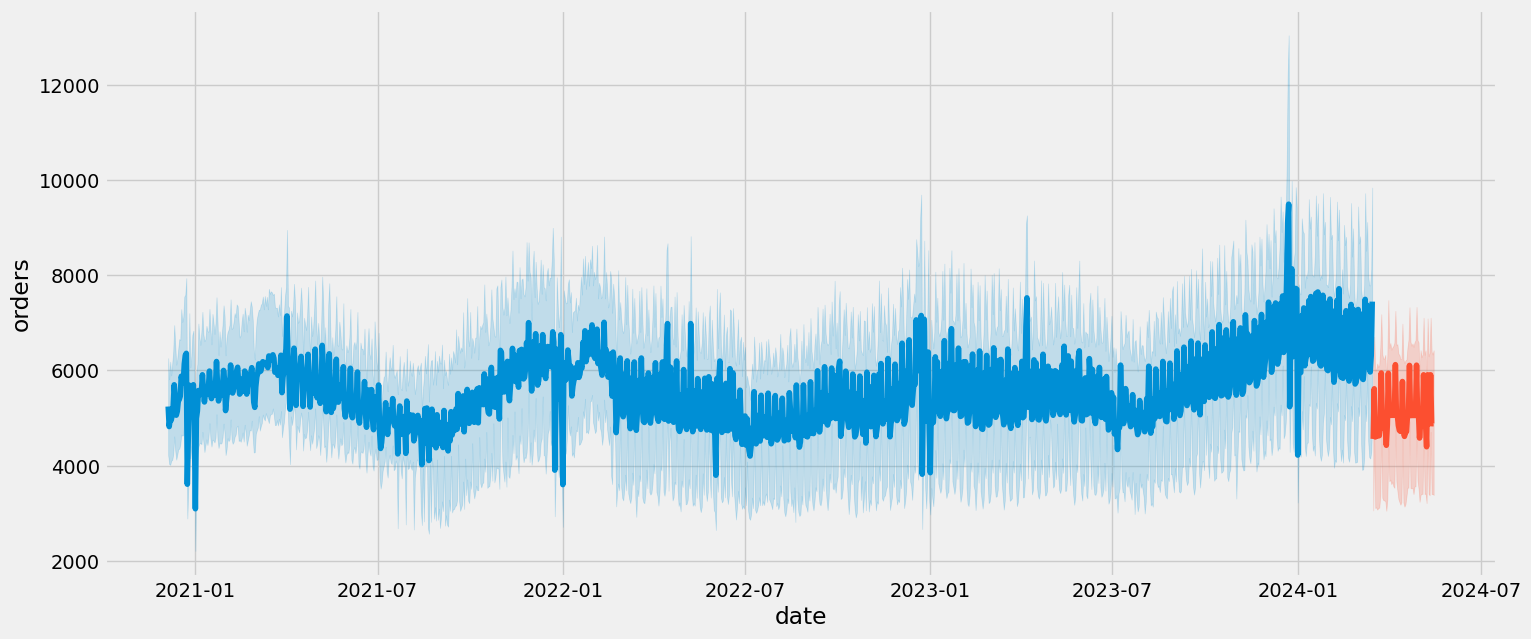

In [58]:
plt.figure(figsize=(16 , 7))
sns.lineplot(x=trian_date, y=train.orders)
sns.lineplot(x=test_date, y= y_predict)
plt.show()

In [59]:
#test['prediction'] = reg.predict(X_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['orders']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

KeyError: "None of [Index(['prediction'], dtype='object')] are in the [columns]"

#check the dates of the test and the train 
#the publich leaderboard is not 30% first of the data and not the last 30% of the data. 
#read the book and finish the course 
#try the same methods here in the foreast one you build.

In [ ]:
#x_train,y_train,x_test, y_test = train_test_split(x,y,test_size=0.2, random_state=23)

#test['prediction'] = RFR.predict(test)
#train['prediction'] = test['prediction']
#test.drop('prediction', axis=1,inplace=True)
df = train.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = train.plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [ ]:
test['prediction'] = RFR.predict(test)
df = train.merge(test[['prediction']], how='left', left_index=True, right_index=True)
ax = train[['order']].plot(figsize=(15, 5))
train['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

In [ ]:
test

In [ ]:
fi = pd.DataFrame(data=model.feature_importances_,
            index=model.feature_names_in_,
            columns=['importance'])

In [ ]:
fi.sort_values('importance').plot(kind='barh')

In [ ]:
RFR.fit(X_train,y_train)
y_predict = RFR.predict(test)

sub_df = pd.DataFrame({'id': test_id,'orders':y_predict})
sub_df.to_csv('submissions.csv', index=False)

In [ ]:
fga

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

best_params = {
    'n_estimators': 703,
    'learning_rate': 0.06814945127794421,
    'max_depth': 7,
    'reg_alpha': 0.07569481465417208,
    'reg_lambda': 2.1073371397761793,
    'num_leaves': 28,
    'subsample': 0.8680610615626715,
    'colsample_bytree': 0.893976646492343,
    'min_child_weight': 14,
    'min_split_gain': 0.7643791668215504,
    'subsample_freq': 2,
    'min_child_samples': 18
}

model = LGBMClassifier(**best_params, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mape = mean_absolute_percentage_error(y_val, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
x[6000:7400]

In [ ]:
x = x[6000:7400]
y = y[6000:7400]

In [ ]:
from lightgbm import LGBMRegressor
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

best_params = {
    'n_estimators': 703,
    'learning_rate': 0.06814945127794421,
    'max_depth': 7,
    'reg_alpha': 0.07569481465417208,
    'reg_lambda': 2.1073371397761793,
    'num_leaves': 28,
    'subsample': 0.8680610615626715,
    'colsample_bytree': 0.893976646492343,
    'min_child_weight': 14,
    'min_split_gain': 0.7643791668215504,
    'subsample_freq': 2,
    'min_child_samples': 18
}

model = LGBMRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

mape = mean_absolute_percentage_error(y_val, y_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

In [ ]:
y_pred = model.predict(test)
sub_df = pd.DataFrame({'id': test_id,'orders':y_pred})
sub_df.to_csv('submissions.csv', index=False)

In [ ]:
y_predict2 = model.fit(X)